# Lineáris regresszió Python-ban



----


Regressziószámítással során véletlen változók között fennálló kapcsolatot modellezzük. A [lineáris regresszió](https://hu.wikipedia.org/wiki/Line%C3%A1ris_regresszi%C3%B) esetében feltételezzük, hogy a magyarázó- ($X$) és a magyarázott ($Y$) változók közti összefüggés lineáris:
$$y_i = c_0 + c_1x_{i1} + c_2x_{i2} + \dots + c_kx_{ik} + \epsilon_i$$

ahol $\epsilon_i$ egy meg nem figyelt véletlen változó, amely "zajjal" perturbálja a magyarázó és a magyarázott változók közötti lineáris kapcsolatot.


A lineáris regresszió becslése során, valamilyen optimumkeresési eljárás segítségével (pl. a [legkisebb négyzetek módszere](https://hu.wikipedia.org/wiki/Legkisebb_n%C3%A9gyzetek_m%C3%B3dszere)), megkeressük a $c_i$ paramétervektorokat, melyekkel minimalizálják a hibát a rendelkezésre álló mintákhoz képest.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Ábra 1. A lineáris regresszió alkalmazásánál, feltételezzük, hogy a rendelkezésre álló minták, megfigyelések (piros pontok), egy függő ($y$) és egy független változó ($x$) közötti lineáris viszonytól (kék vonal) való véletlenszerű kisebb eltérésekből (zöld vonalak) származnak. [Kép forrása](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Linear_least_squares_example2.png/952px-Linear_least_squares_example2.png)

Python-ban, a lineáris regresszió számítására a `scikit-learn` csomag [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) modelljét [alkalmazhatjuk](https://realpython.com/linear-regression-in-python/).

## Példa

 

Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


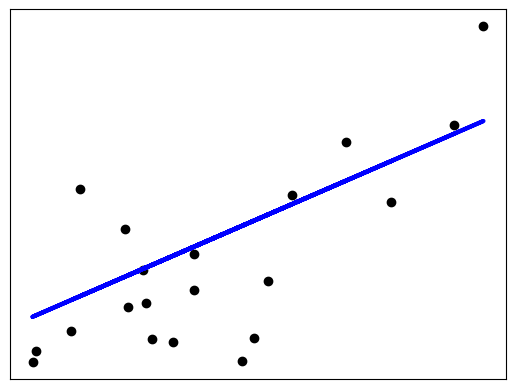

In [1]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Feladatok

1.	Illesszünk lineáris regresszió függvényt `sklearn.linear_model.LinearRegression` segítségével, a következő adatokra: 
```python
rng = np.random.RandomState(42) 
x = 10 * rng.rand(100) 
y = 2 * x - 5 + rng.randn(100) 
plt.scatter(x, y);
```

2.	Írassuk ki a regressziós egyenes hibáját (R négyzet érték) és a regressziós vonal lejtő-elfogását (*intercept*) és meredekségét (*slope*). 

3.	A `house_sales.csv` állomány házeladási tranzakciókat tartalmaz, feltüntetve a ház paramétereit (szobák, emeletek száma, terület, állapot, kilátás stb.) és az eladási árat. Vizualizáljuk a paraméterek eloszlását majd építsünk egy lineáris regresszió modellt, mely különböző paraméterekre, megbecsüli egy háznak az árát. Vizsgáljuk meg a modell pontosságát. 

4.	Teszteljük vizuálisan (ha valamilyen mintázat látszik a ploton, akkor valamilyen nemlineáris hatás is jelen van) a linearitást  a reziduálisok és regressziós paraméterek pontdiagramon való ábrázolásával. (A reziduális annak mértéke, hogy egy pont milyen távolságra van függőlegesen a regressziós egyenestől. Egyszerűen az előre jelzett érték és a megfigyelt tényleges érték közötti eltérést/hibát jelenti.)

5.	Ábrázoljuk a reziduálisok eloszlását hisztogram és [Q–Q plot](https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0) segítségével.

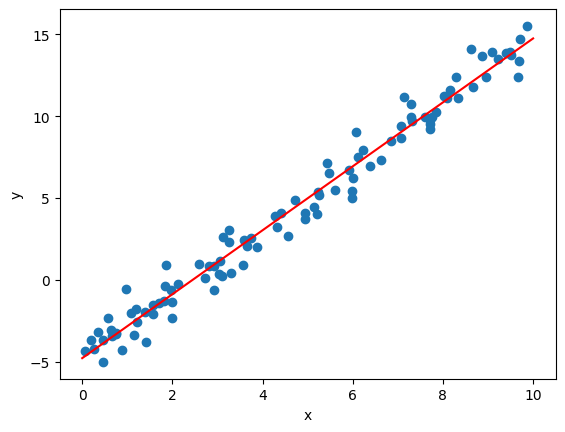

In [2]:
#1
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


rng = np.random.RandomState(42)
x = 10 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)


model = LinearRegression()
model.fit(x[:, np.newaxis], y)


x_fit = np.linspace(0, 10, 100)
y_fit = model.predict(x_fit[:, np.newaxis])


plt.scatter(x, y)
plt.plot(x_fit, y_fit, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
#2
from sklearn.metrics import r2_score


y_pred = model.predict(x[:, np.newaxis])
r_squared = r2_score(y, y_pred)


slope = model.coef_[0]
intercept = model.intercept_


print("R sqare:", r_squared)
print("intercept:", intercept)
print("slope:", slope)

R sqare: 0.9764567983510799
intercept: -4.78490384245325
slope: 1.9540226772876963
